In [19]:
import sys
sys.path.append('../notebooks/')
import xarray as xr
from metpy.units import units
import matplotlib.pyplot as plt
import numpy as np

from Data import Data
from Map import Map

Documentation is here:
https://confluence.ecmwf.int/display/DAC/ECMWF+open+data%3A+real-time+forecasts

---
    ECMWFOpenData Documentation is here:
    https://github.com/ecmwf/ecmwf-opendata
---

In [5]:
ROOT = 'https://data.ecmwf.int/forecasts'
yyyymmdd = '20230712'
HH = '12'
resol = '0p4-beta'
stream = 'enfo'
step = 24
U = 'h'
type = 'ef'
format = 'grib2'

In [6]:
data_url = f'{ROOT}/{yyyymmdd}/{HH}z/{resol}/{stream}/{yyyymmdd}{HH}0000-{step}{U}-{stream}-{type}.{format}'
data_url

'https://data.ecmwf.int/forecasts/20230712/12z/0p4-beta/enfo/20230712120000-24h-enfo-ef.grib2'

In [7]:
ds = Data(data_url)
data = ds.pygrib_read_dataset()

In [12]:
t2m = data[1]
lats, lons = t2m.latlons()
#vt = f'{t2m.validityDate} {t2m.validityTime}'

[[-180.  -179.6 -179.2 ...  178.8  179.2  179.6]
 [-180.  -179.6 -179.2 ...  178.8  179.2  179.6]
 [-180.  -179.6 -179.2 ...  178.8  179.2  179.6]
 ...
 [-180.  -179.6 -179.2 ...  178.8  179.2  179.6]
 [-180.  -179.6 -179.2 ...  178.8  179.2  179.6]
 [-180.  -179.6 -179.2 ...  178.8  179.2  179.6]]


In [16]:
t2m_messages = data.select(name='2 metre temperature')

In [21]:
def get_gridpoint_value(lat_of_interest: float, lon_of_interest: float, data_1d) -> int:
    '''
    Calculate the closest gridpoint value to a given latitude
    and longitude.
    '''
    abs_lat = np.abs(lats - lat_of_interest)
    abs_lon = np.abs(lons - lon_of_interest)
    
    overlap_latlon = np.maximum(abs_lon, abs_lat)
    latlon_idx = np.argmin(overlap_latlon)
    
    data_1d = data_1d.flatten()
    
    return data_1d[latlon_idx]

In [25]:
def convert_to_fahrenheit(temperature):
    return (temperature - 273.15) * 9/5 + 32

In [23]:
member_values = [get_gridpoint_value(29.65, -82.32, m.values) for m in t2m_messages]

In [26]:
member_values_fahrenheit = [convert_to_fahrenheit(value) for value in member_values]

In [27]:
member_values_fahrenheit

[77.44089782714848,
 78.05138061523442,
 76.90918701171879,
 78.43559997558597,
 77.84203613281254,
 77.65189025878911,
 78.55576293945316,
 78.66804321289067,
 77.85208862304691,
 77.61110351562505,
 78.19214294433598,
 78.73267028808598,
 78.25251281738285,
 78.22837036132816,
 77.8142407226563,
 78.23581359863286,
 78.6599957275391,
 77.90531738281254,
 78.73841064453129,
 77.97324035644536,
 78.33916748046879,
 78.25520446777348,
 78.53700378417973,
 76.63694580078129,
 76.39508178710942,
 77.1594830322266,
 75.72854125976566,
 78.1763500976563,
 77.91188171386723,
 78.29200866699223,
 77.04810913085942,
 78.01691101074223,
 78.2873394775391,
 78.0098248291016,
 77.92750976562505,
 78.31024597167973,
 77.80935180664066,
 78.22565124511723,
 76.75952575683598,
 77.64966552734379,
 77.21463439941411,
 78.38588684082035,
 78.7689801025391,
 77.67205017089847,
 76.99161193847661,
 78.74906738281254,
 77.16992004394535,
 78.76425598144536,
 77.47124755859379,
 77.30834777832035,
 78.714

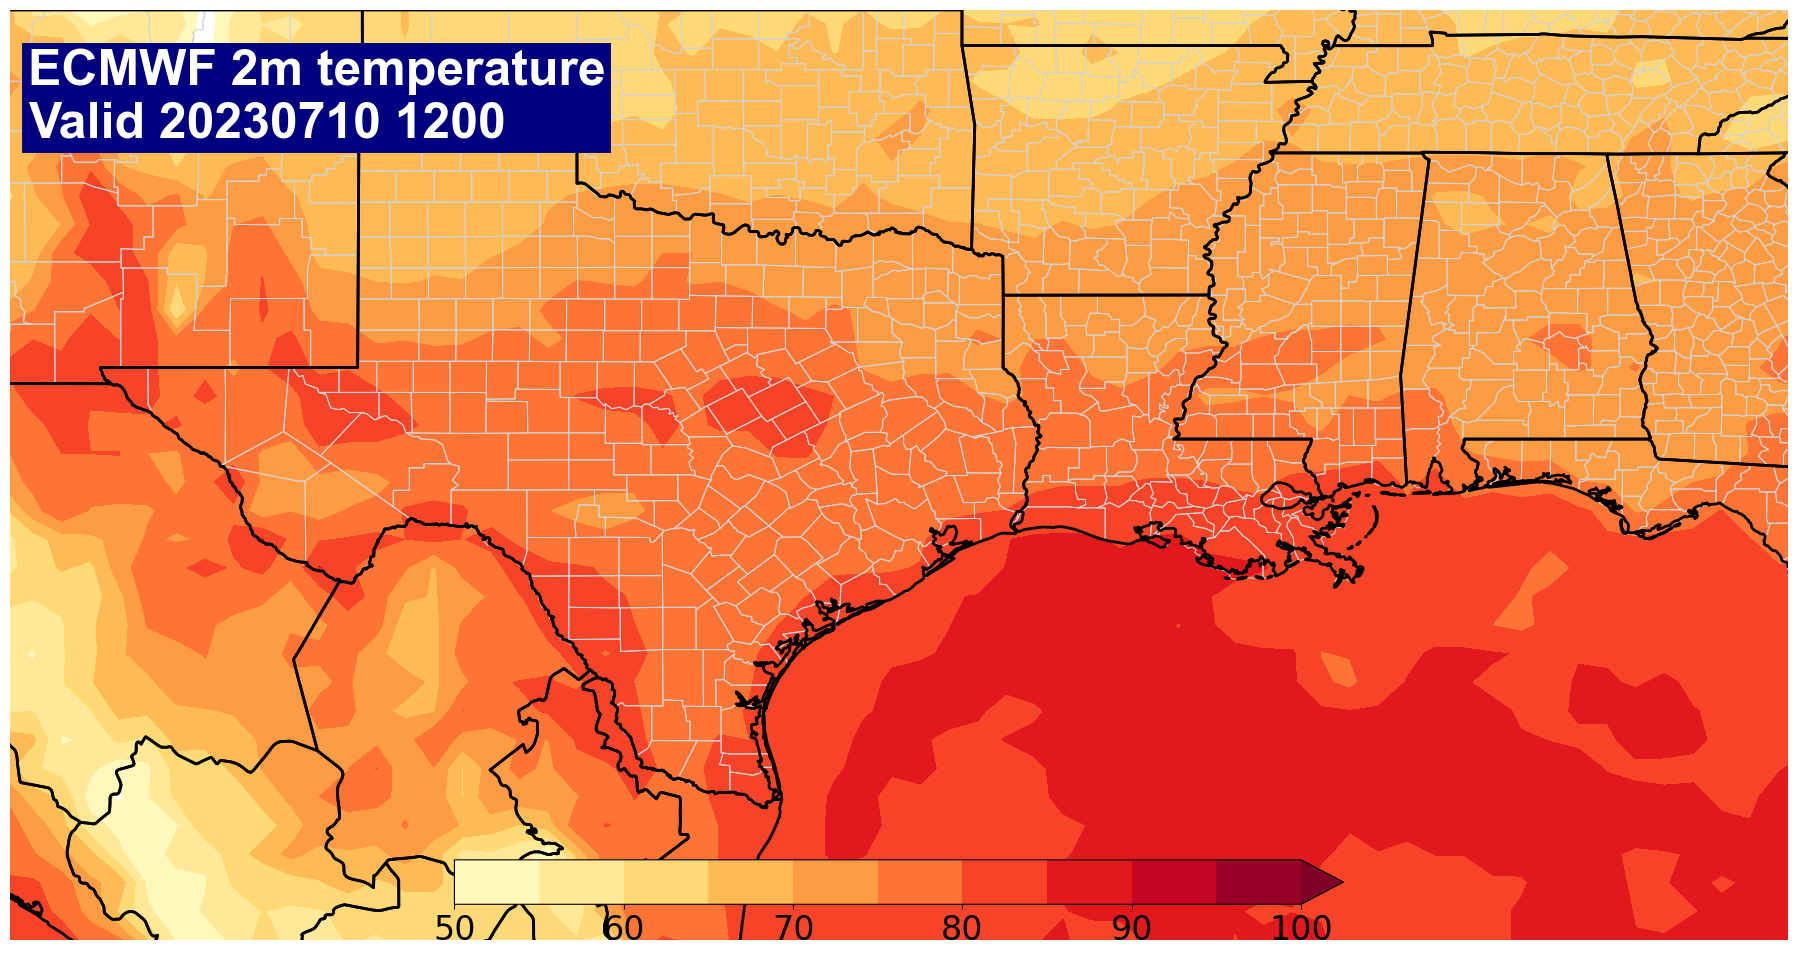

In [46]:



# Save and show figure
#plt.savefig(f'ecmwf_test.png', dpi=72)
#plt.show()